- 模型优化
  - 模型调优
    - 网络类型：AlexNet、ResNet、LSTM、GRU、Transformer
    - 网络大小：层数、神经元个数
    - 正则化：L1、L2、Dropout
    - 激活函数：ReLU、Sigmoid、Tanh
  - 训练调优
    - batch_size：根据拟合程度调整
    - epochs：根据拟合程度调整
    - 学习率：根据收敛程度调整
    - 优化器：Optimizer(SGD、Adam、RMSprop)、lr_scheduler(step、linear)

In [ ]:
# 1.1 模型调优：网络类型
# TODO


In [ ]:
# 1.2 模型调优：网络大小
# TODO


In [ ]:
# 1.3 模型调优：正则化
# TODO


In [ ]:
# 1.4 模型调优：计划函数
# TODO


In [ ]:
# 2.1 训练调优：batch_size
# TODO


In [ ]:
# 2.2 训练调优：epochs
# TODO


In [ ]:
# 2.3 训练调优：学习率
# TODO


In [ ]:
        #
# # 标签分布图
# self.labels_pie("Training label distribution [Standard]", self.train_labels)
# self.labels_pie("Evaluating label distribution [Standard]", self.eval_labels)

In [ ]:
# 2.4 训练调优：优化器
# TODO


INFO:root:[file/train.ndjson] - 50836 comments loaded.


token长度0 占比0.0315%
token长度1 占比0.2223%
token长度2 占比1.1094%
token长度3 占比3.0628%
token长度4 占比6.3498%
token长度5 占比10.7719%
token长度6 占比16.5945%
token长度7 占比23.3555%
token长度8 占比30.1755%
token长度9 占比36.5194%
token长度10 占比42.3224%
token长度11 占比47.8913%
token长度12 占比52.9998%
token长度13 占比57.5596%
token长度14 占比61.6020%
token长度15 占比65.2156%
token长度16 占比68.4082%
token长度17 占比71.3786%
token长度18 占比73.8945%
token长度19 占比76.1449%
token长度20 占比78.1887%
token长度21 占比80.0201%
token长度22 占比81.6764%
token长度23 占比83.2973%
token长度24 占比84.6329%
token长度25 占比85.9037%
token长度26 占比87.0328%
token长度27 占比87.9436%
token长度28 占比88.7993%
token长度29 占比89.5999%
token长度30 占比90.3553%
token长度31 占比91.0083%
token长度32 占比91.6103%
token长度33 占比92.1729%
token长度34 占比92.7433%
token长度35 占比93.1525%
token长度36 占比93.6266%
token长度37 占比94.0318%
token长度38 占比94.4390%
token长度39 占比94.8088%
token长度40 占比95.0921%
token长度41 占比95.3399%
token长度42 占比95.5779%
token长度43 占比95.8396%
token长度44 占比96.0382%
token长度45 占比96.2271%
token长度46 占比96.4179%
token长度47 占比96.6323%
token长度

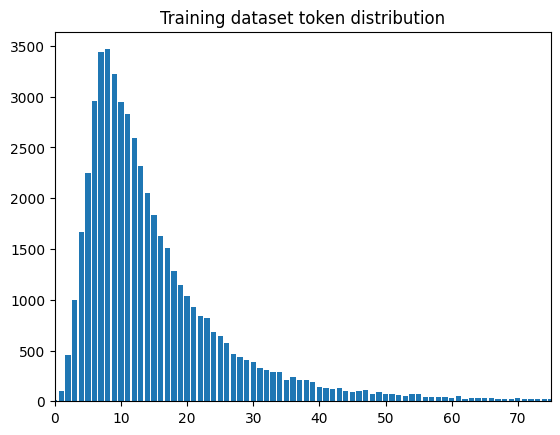

In [2]:

# 3.1 数据集token长度分布
import dataset
from init import config

train_contents, _ = dataset.load_contents_labels(config.train_data_path)
stopwords = dataset.load_stopwords(config.stopwords_path)
train_tokens = dataset.tokenization(train_contents, stopwords)
dataset.tokens_pie("Training dataset token distribution", train_tokens)

INFO:root:[file/train.ndjson] - 50836 comments loaded.


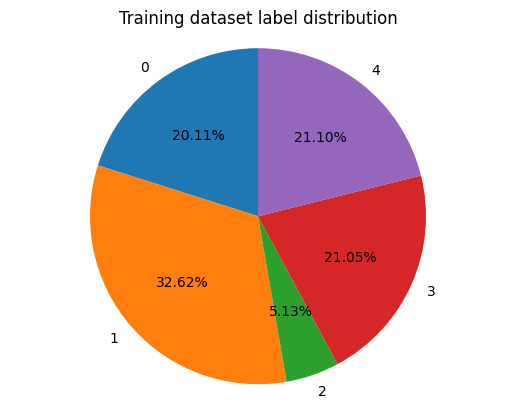

INFO:root:[file/validation.ndjson] - 6355 comments loaded.


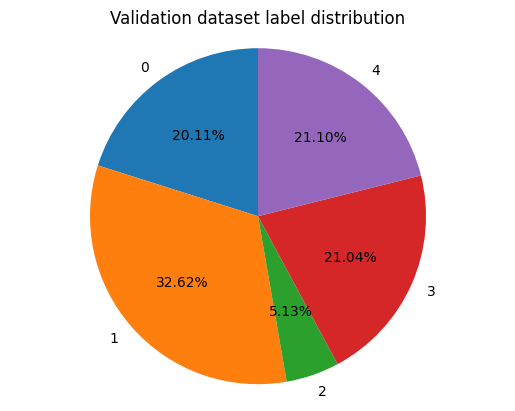

INFO:root:[file/test.ndjson] - 6356 comments loaded.


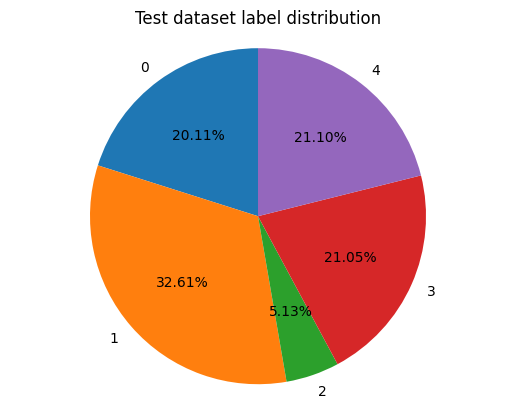

In [3]:
# 3.2 数据集标签分布
import dataset
from init import config

_, train_emotions = dataset.load_contents_labels(config.train_data_path)
dataset.labels_pie("Training dataset label distribution", train_emotions)

_, validation_emotions = dataset.load_contents_labels(config.validation_data_path)
dataset.labels_pie("Validation dataset label distribution", validation_emotions)

_, test_emotions = dataset.load_contents_labels(config.test_data_path)
dataset.labels_pie("Test dataset label distribution", test_emotions)

In [4]:
# 3.3 模型参数量
import embedding
import model
from init import config


def count_trainable_parameters(model):
    """
    计算模型参数的总数
    :param model: 模型
    :return: 模型参数的总数
    """
    sum = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"name[{name}]  shape[{param.shape}]  numel[{param.numel()}]")  # number of elements
            sum += param.numel()
    return sum


model = model.SentimentAnalysisModel().load(config.model_pt_path).to(config.device)
word_embedding = embedding.WordEmbedding().load(config.embedding_pt_path).to(config.device)

# 计算可训练参数的总数
print(f"Model [{model.model_type}]  Total number of trainable parameters [{count_trainable_parameters(model)}]")
print(f"WordEmbedding [{word_embedding.vectors.shape}]  Total number of trainable parameters [{word_embedding.vectors.numel()}]")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yangyunxiang/Documents/project/HAI/DL/deep_learning_2024/pt/model_Transformer_512_0.4_ReLU_100_35_256_50_0.001_0.5.pt'